This notebooks shows a simple way to build an heatmap for the Bird Eye View.

In [2]:
import sys
sys.path.append('/usr/include/opencv4/opencv2')
import cv2
import numpy as np
import time
import argparse
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfilename
import os
import va
import shutil
# own modules
import utills, plot

import matplotlib.pyplot as plt


In [3]:
frames=[]

In [4]:
vidcap = cv2.VideoCapture("bird_eye_view.avi")

success,image = vidcap.read()
count = 0
while success:
    success,image = vidcap.read()
    frames.append(image)
    
    count += 1

In [5]:
del frames[-1]

In [6]:
for frame in frames:
    frame = cv2.rotate(frame,cv2.ROTATE_180)

""
""

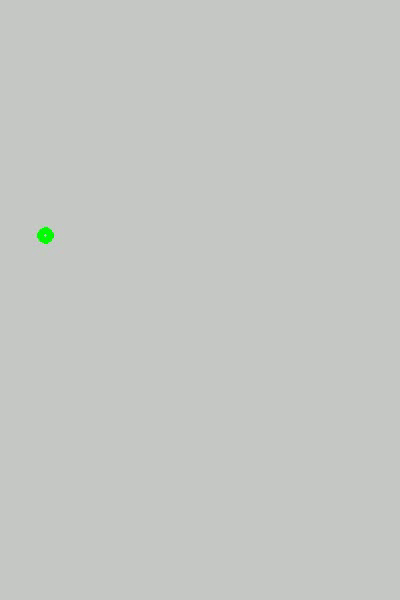

In [7]:
va.show(frames[100])

In [8]:
# Converts in Grayscale
grayscale = []
for frame in frames:
    cv2.normalize(frame, frame, 0, 255, cv2.NORM_MINMAX)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    grayscale.append(gray)

""
""

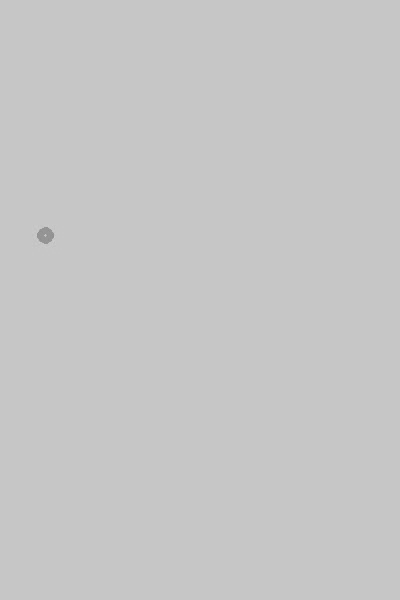

In [9]:
va.show(grayscale[100])

In [10]:
# Global threshold (200)
binary = []
for gray in grayscale:
    _, bina = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
    bina=np.invert(bina)
    binary.append(bina)

""
""

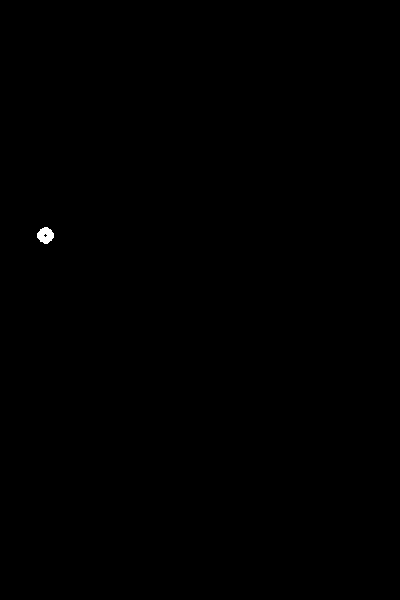

In [11]:
va.show(binary[100])

In [12]:
final = []
# The binarized image shows two problems
# - Some small connected components due to noise.
# - Some holes inside the objects.
for bina in binary:
    s = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    # The "opening" solves the first problem.
    res1 = cv2.morphologyEx(bina, cv2.MORPH_OPEN, s)
    # Closure solves the second.
    res2 = cv2.morphologyEx(res1, cv2.MORPH_CLOSE, s)
    final.append(res2)

""
""

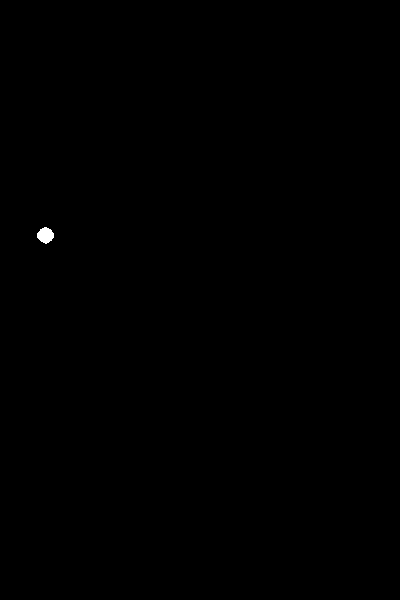

In [13]:
va.show(final[100])

In [14]:
graymap = np.zeros((600,400),dtype="int64")
for fin in final:
    graymap += fin

In [15]:
np.set_printoptions(threshold=sys.maxsize)
print(graymap)

[[     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0

""
""

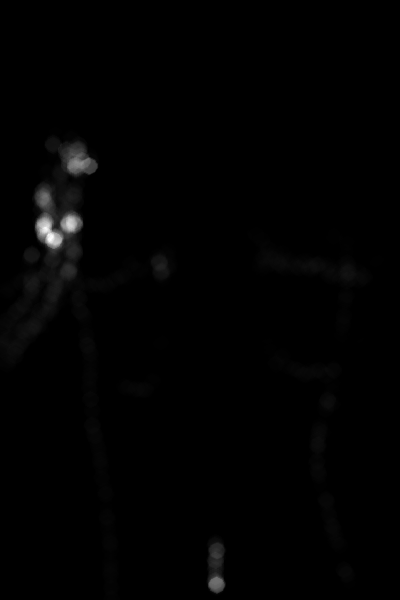

In [16]:
va.show(graymap)

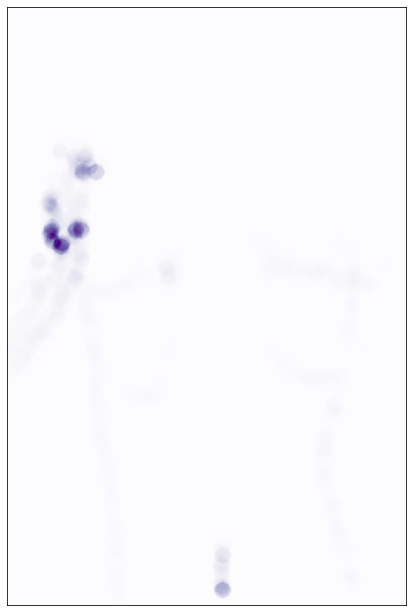

In [17]:
def heatmap2d(arr: np.ndarray):
    plt.figure(figsize=(8, 11))
    plt.imshow(arr, cmap='Purples')
    plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False, labelleft=False)
    plt.show()
    
heatmap2d(graymap)

In [18]:
onlyreds = []

In [19]:
# The order of the colors is blue, green, red
lower_color_bounds = np.array([0, 0, 100])
upper_color_bounds = np.array([80,80,255])
for frame in frames:
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(frame,lower_color_bounds,upper_color_bounds )
    mask_rgb = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
    onlyred = frame & mask_rgb
    onlyreds.append(onlyred)

""
""

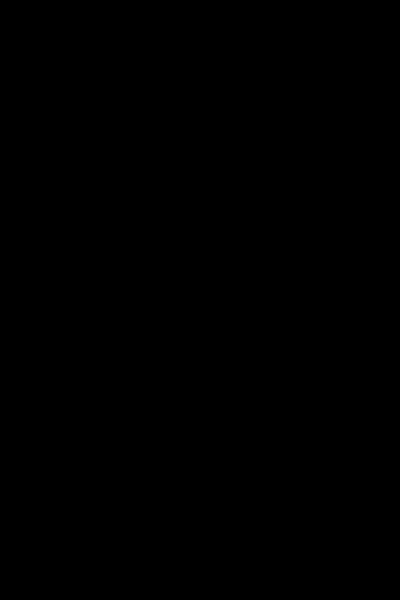

In [20]:
va.show(onlyreds[100])

In [21]:
final2 = []
for red in onlyreds:
    s = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    res2 = cv2.morphologyEx(red, cv2.MORPH_CLOSE, s)
    final2.append(res2)

""
""

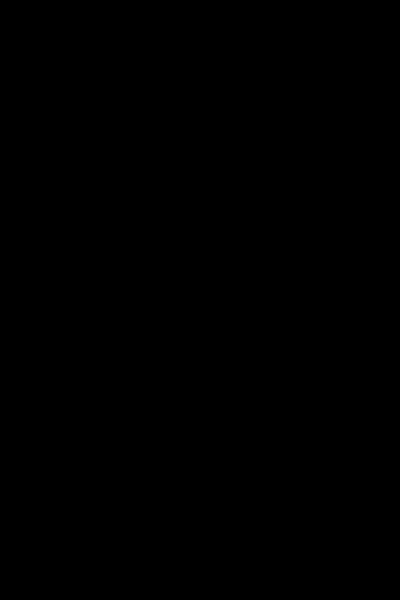

In [22]:
va.show(final2[100])

""
""

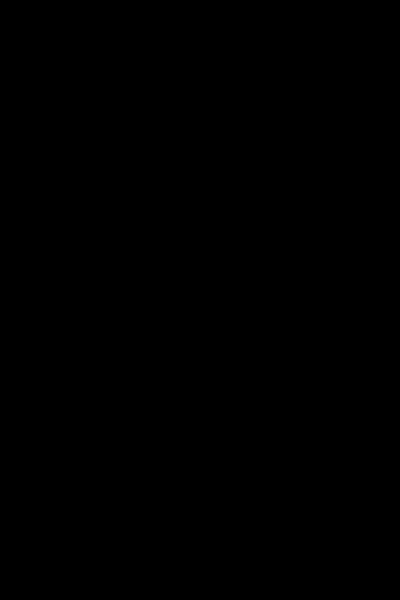

In [23]:
# Converte in Grayscale
grayred = []
for red in final2:
    gray = cv2.cvtColor(red, cv2.COLOR_BGR2GRAY)
    grayred.append(gray)
    
va.show(grayred[100])

In [24]:
binaryRed = []
for gray in grayred:
    _, bina = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
    binaryRed.append(bina)

""
""

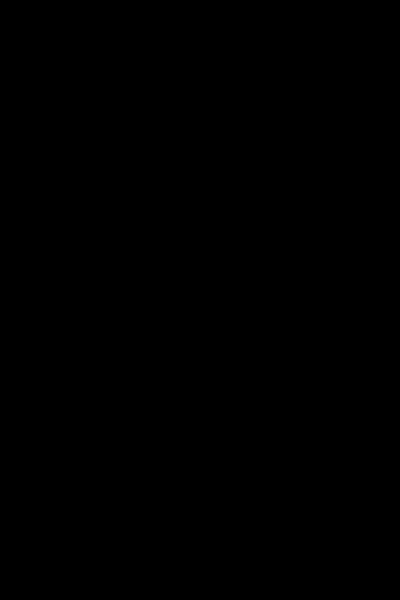

In [25]:
va.show(binaryRed[100])

In [26]:
redmap = np.zeros((600,400),dtype="int64")
for red in grayred:
    redmap += red

""
""

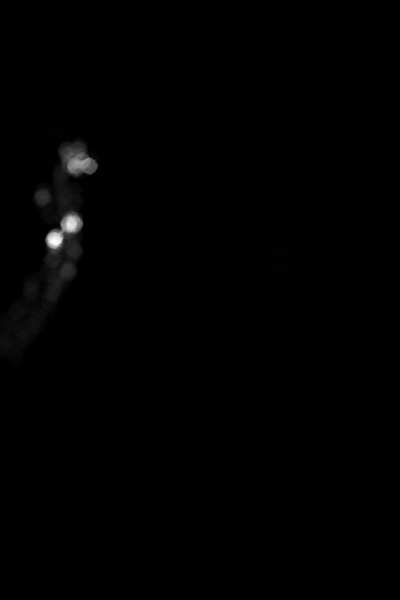

In [27]:
va.show(redmap)

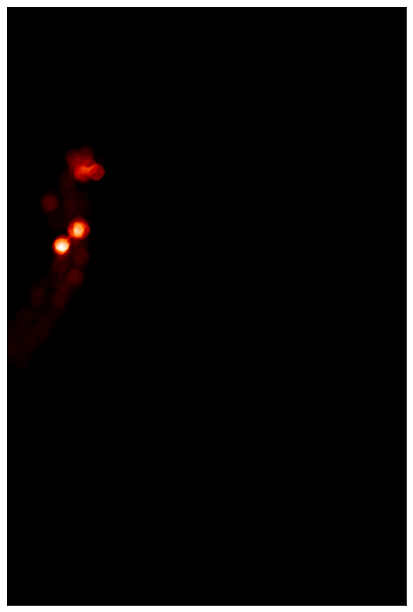

In [28]:
def heatmap22d(arr: np.ndarray):
    plt.figure(figsize=(8, 11))
    plt.imshow(arr, cmap='gist_heat')
    plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False, labelleft=False)
    plt.show()
    
heatmap22d(redmap)

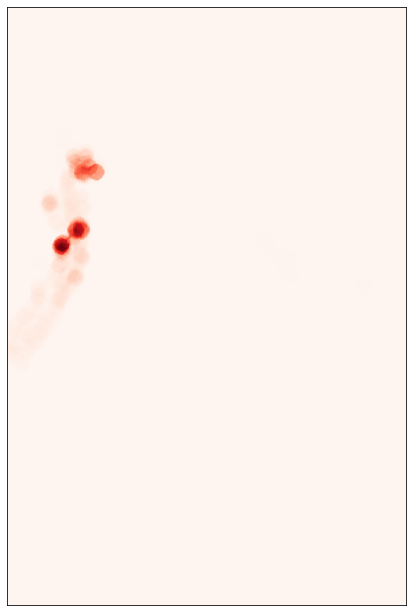

In [29]:
def heatmap222d(arr: np.ndarray):
    plt.figure(figsize=(8, 11))
    plt.imshow(arr, cmap='Reds')
    plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False, labelleft=False)
    plt.show()
    
heatmap222d(redmap)